In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import sys
sys.path.append('..')
from models.mnist_autoencoder import MNISTAutoencoder
from trainers.autoencoder_trainer import AutoencoderTrainer

In [20]:
import importlib
import models.mnist_autoencoder
import trainers.autoencoder_trainer
# importlib.reload(models.mnist_autoencoder)  
# importlib.reload(trainers.autoencoder_trainer)

In [2]:
transform = transforms.Compose([
    transforms.ToTensor()
])
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
val_dataset   = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)

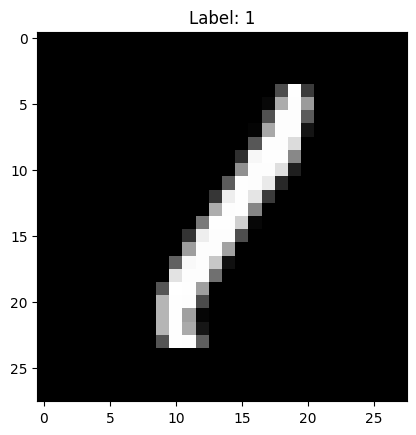

In [3]:

images, labels = next(iter(train_loader))
single_image = images[0]  
single_label = labels[0]  
import matplotlib.pyplot as plt
plt.imshow(single_image.squeeze(0), cmap="gray")  
plt.title(f"Label: {single_label.item()}")
plt.show()

In [4]:
autoencoder = MNISTAutoencoder(latent_dim=128)
print(autoencoder)

MNISTAutoencoder(
  (encoder): Encoder(
    (conv): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (fc): Linear(in_features=3136, out_features=128, bias=True)
  )
  (decoder): Decoder(
    (fc): Linear(in_features=128, out_features=3136, bias=True)
    (deconv): Sequential(
      (0): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): ConvTranspose2d(32, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    )
    (out_activation): Sigmoid()
  )
)


In [5]:
trainer = AutoencoderTrainer(
    model=autoencoder,
    train_loader=train_loader,
    val_loader=val_loader,
    device='cuda',
    lr=1e-3,
    num_epochs=10,
    save_path='autoencoder_checkpoint.pth',
    resume_path=None  # start from scratch
)
trainer.train()


Epoch [1] - Train Loss: 0.0138
Epoch [1] - Val   Loss: 0.0032
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [2] - Train Loss: 0.0026
Epoch [2] - Val   Loss: 0.0021
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [3] - Train Loss: 0.0019
Epoch [3] - Val   Loss: 0.0017
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [4] - Train Loss: 0.0016
Epoch [4] - Val   Loss: 0.0015
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [5] - Train Loss: 0.0014
Epoch [5] - Val   Loss: 0.0013
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [6] - Train Loss: 0.0013
Epoch [6] - Val   Loss: 0.0012
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [7] - Train Loss: 0.0012
Epoch [7] - Val   Loss: 0.0011
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [8] - Train Loss: 0.0011
Epoch [8] - Val   Loss: 0.0011
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [9] - Train Loss: 0.0010
Epoch [9] - Val   Loss: 0.0011
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [10] - Train 

In [6]:
autoencoder_2 = MNISTAutoencoder(latent_dim=128)

trainer2 = AutoencoderTrainer(
    model=autoencoder_2,
    train_loader=train_loader,
    val_loader=val_loader,
    device='cuda',
    lr=1e-3,
    num_epochs=10,                      # train 10 more epochs
    save_path='autoencoder_checkpoint.pth',
    resume_path='autoencoder_checkpoint.pth'  # resume from the last checkpoint
)
trainer2.train()  

Resuming training from checkpoint: autoencoder_checkpoint.pth
Resumed at epoch 11
Epoch [11] - Train Loss: 0.0010
Epoch [11] - Val   Loss: 0.0010
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [12] - Train Loss: 0.0009
Epoch [12] - Val   Loss: 0.0009
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [13] - Train Loss: 0.0009
Epoch [13] - Val   Loss: 0.0009
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [14] - Train Loss: 0.0009
Epoch [14] - Val   Loss: 0.0009
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [15] - Train Loss: 0.0008
Epoch [15] - Val   Loss: 0.0009
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [16] - Train Loss: 0.0008
Epoch [16] - Val   Loss: 0.0009
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [17] - Train Loss: 0.0008
Epoch [17] - Val   Loss: 0.0009
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [18] - Train Loss: 0.0008
Epoch [18] - Val   Loss: 0.0009
Checkpoint saved to autoencoder_checkpoint.pth
Epoch [19] - Train Loss: 0.000

In [9]:
from models.mnist_calssifier import MNISTClassifier
from trainers.classifier_trainer import ClassifierTrainer

In [10]:
classifier = MNISTClassifier(latent_dim=128, num_classes=10)


In [12]:
print(classifier)

MNISTClassifier(
  (net): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [11]:
trainer = ClassifierTrainer(
    encoder=autoencoder_2.encoder,
    classifier=classifier,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    save_path='classifier_checkpoint.pth'
)
trainer.train() 

Epoch [1] - Train Loss: 0.3913, Train Acc: 0.8937
Epoch [1] - Val   Loss: 0.1992, Val   Acc: 0.9413
Checkpoint saved to classifier_checkpoint.pth
Epoch [2] - Train Loss: 0.1724, Train Acc: 0.9506
Epoch [2] - Val   Loss: 0.1417, Val   Acc: 0.9581
Checkpoint saved to classifier_checkpoint.pth
Epoch [3] - Train Loss: 0.1250, Train Acc: 0.9642
Epoch [3] - Val   Loss: 0.1123, Val   Acc: 0.9662
Checkpoint saved to classifier_checkpoint.pth
Epoch [4] - Train Loss: 0.0977, Train Acc: 0.9721
Epoch [4] - Val   Loss: 0.1008, Val   Acc: 0.9701
Checkpoint saved to classifier_checkpoint.pth
Epoch [5] - Train Loss: 0.0807, Train Acc: 0.9766
Epoch [5] - Val   Loss: 0.0884, Val   Acc: 0.9729
Checkpoint saved to classifier_checkpoint.pth
Epoch [6] - Train Loss: 0.0685, Train Acc: 0.9805
Epoch [6] - Val   Loss: 0.0861, Val   Acc: 0.9736
Checkpoint saved to classifier_checkpoint.pth
Epoch [7] - Train Loss: 0.0594, Train Acc: 0.9824
Epoch [7] - Val   Loss: 0.0828, Val   Acc: 0.9734
Checkpoint saved to clas

In [ ]:
# Tried to train the classifier for 10 more epochs
# but it seems that the classifier is already trained 
# and any further training mosly causes overfitting

trainer2 = ClassifierTrainer(
    encoder=autoencoder_2.encoder,
    classifier=classifier,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,                           # do 5 more epochs
    save_path='classifier_checkpoint.pth',
    resume_path='classifier_checkpoint.pth' # resume from last checkpoint
)
trainer2.train()

Resuming training from checkpoint: classifier_checkpoint.pth
Resumed at epoch 11
Epoch [11] - Train Loss: 0.0366, Train Acc: 0.9893
Epoch [11] - Val   Loss: 0.0828, Val   Acc: 0.9747
Checkpoint saved to classifier_checkpoint.pth
Epoch [12] - Train Loss: 0.0333, Train Acc: 0.9900
Epoch [12] - Val   Loss: 0.0842, Val   Acc: 0.9746
Checkpoint saved to classifier_checkpoint.pth
Epoch [13] - Train Loss: 0.0302, Train Acc: 0.9911
Epoch [13] - Val   Loss: 0.0825, Val   Acc: 0.9765
Checkpoint saved to classifier_checkpoint.pth
Epoch [14] - Train Loss: 0.0273, Train Acc: 0.9918
Epoch [14] - Val   Loss: 0.0856, Val   Acc: 0.9757
Checkpoint saved to classifier_checkpoint.pth
Epoch [15] - Train Loss: 0.0243, Train Acc: 0.9927
Epoch [15] - Val   Loss: 0.0888, Val   Acc: 0.9749
Checkpoint saved to classifier_checkpoint.pth
Epoch [16] - Train Loss: 0.0226, Train Acc: 0.9936
Epoch [16] - Val   Loss: 0.0911, Val   Acc: 0.9754
Checkpoint saved to classifier_checkpoint.pth
Epoch [17] - Train Loss: 0.0202